In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import os
import warnings

os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = 'Kaiti'
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../../models/image/image4"
DATA_PATH = '../../data'
RESULT_PATH = '../../data/summary'

In [2]:
def create_dir(file_path):
    if os.path.exists(file_path):
        return
    os.makedirs(file_path)

count = 0

def savefig():
    global count
    count += 1
    PIC_NAME = PIC_PATH + f'/figure{count}.png'
    plt.savefig(PIC_NAME)

In [3]:
create_dir(PIC_PATH)

In [4]:
def read_excel(excel_path):
    return pd.read_excel(excel_path, index_col=0)

data = read_excel(RESULT_PATH + '/result3.xlsx')
data

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,
15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1
15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1
15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1
15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1
15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...
15815628,711,1,37,老客户,中上资产,1,0,0,80215.20,0
15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0
15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1


In [5]:
MAP = {
    'is_active': {
        'Status': {
            '新客户': 3,
            '稳定客户': 4,
            '老客户': 5,
        },
        'Asset': {
            '低资产': 6,
            '中下资产': 7,
            '中上资产': 8,
            '高资产': 9
        },
        'Card': {
            '低资产': 6,
            '中下资产': 7,
            '中上资产': 9,
            '高资产': 9
        },
    },
    'not_active': {
        'Status': {
            '新客户': 0,
            '稳定客户': 1,
            '老客户': 2,
        },
        'Asset': {
            '低资产': 0,
            '中下资产': 1,
            '中上资产': 2,
            '高资产': 3
        },
        'Card': {
            '低资产': 0,
            '中下资产': 2,
            '中上资产': 5,
            '高资产': 5
        },
    }
}

In [6]:
copy = data.copy()
copy

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,
15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1
15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1
15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1
15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1
15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...
15815628,711,1,37,老客户,中上资产,1,0,0,80215.20,0
15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0
15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1


In [7]:
active_group = data.groupby('IsActiveMember')

active = active_group.get_group(1)
active

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,
15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1
15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1
15553670,635,1,32,老客户,低资产,2,1,1,19367.98,1
15553727,613,1,51,老客户,高资产,1,1,1,53630.90,1
15553901,678,1,28,稳定客户,低资产,2,1,1,144423.17,1
...,...,...,...,...,...,...,...,...,...,...
15815626,640,0,63,新客户,中下资产,2,1,1,112503.24,1
15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0
15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1


In [8]:
copy[['IsActiveStatus', 'IsActiveAssetStage', 'CrCardAssetStage']] = np.nan
copy

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
CustomerId,,,,,,,,,,,,,
15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1,NaN,NaN,NaN
15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1,NaN,NaN,NaN
15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1,NaN,NaN,NaN
15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1,NaN,NaN,NaN
15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815628,711,1,37,老客户,中上资产,1,0,0,80215.20,0,NaN,NaN,NaN
15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0,NaN,NaN,NaN
15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1,NaN,NaN,NaN


In [9]:
copy['IsActiveStatus'].loc[active.index] = active['Status'].map(MAP['is_active']['Status'])
copy['IsActiveAssetStage'].loc[active.index] = active['AssetStage'].map(MAP['is_active']['Asset'])
copy['CrCardAssetStage'].loc[active.index] = active['AssetStage'].map(MAP['is_active']['Card'])

copy

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
CustomerId,,,,,,,,,,,,,
15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1,3.0,9.0,9.0
15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1,5.0,6.0,6.0
15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1,NaN,NaN,NaN
15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1,NaN,NaN,NaN
15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815628,711,1,37,老客户,中上资产,1,0,0,80215.20,0,NaN,NaN,NaN
15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0,5.0,9.0,9.0
15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1,5.0,8.0,9.0


In [10]:
not_active = active_group.get_group(0)
not_active

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,
15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1
15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1
15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1
15553444,480,0,44,老客户,高资产,1,1,0,5472.70,1
15553496,717,1,42,稳定客户,高资产,1,1,0,99347.80,1
...,...,...,...,...,...,...,...,...,...,...
15815428,823,0,34,新客户,中上资产,1,1,0,9217.92,0
15815443,527,1,46,老客户,高资产,1,1,0,54947.51,0
15815490,670,0,40,新客户,高资产,3,0,0,177028.00,1


In [11]:
copy['IsActiveStatus'].loc[not_active.index] = not_active['Status'].map(MAP['not_active']['Status'])
copy['IsActiveAssetStage'].loc[not_active.index] = not_active['AssetStage'].map(MAP['not_active']['Asset'])
copy['CrCardAssetStage'].loc[not_active.index] = not_active['AssetStage'].map(MAP['not_active']['Card'])

copy

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
CustomerId,,,,,,,,,,,,,
15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1,3.0,9.0,9.0
15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1,5.0,6.0,6.0
15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1,2.0,2.0,5.0
15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1,0.0,0.0,0.0
15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815628,711,1,37,老客户,中上资产,1,0,0,80215.20,0,2.0,2.0,5.0
15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0,5.0,9.0,9.0
15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1,5.0,8.0,9.0


In [12]:
copy.isna().sum()

CreditScore           0
Gender                0
Age                   0
Status                0
AssetStage            0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
IsActiveStatus        0
IsActiveAssetStage    0
CrCardAssetStage      0
dtype: int64

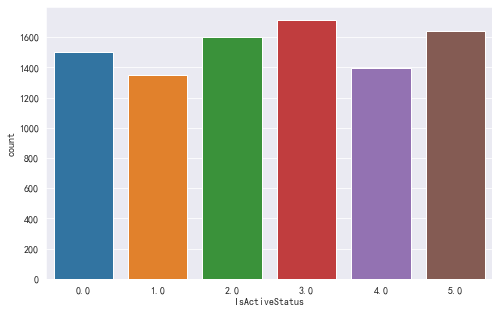

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(copy['IsActiveStatus'])
savefig()

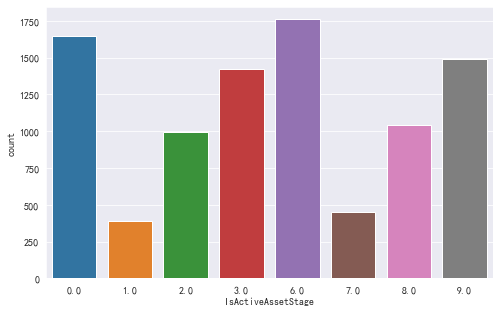

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(copy['IsActiveAssetStage'])
savefig()

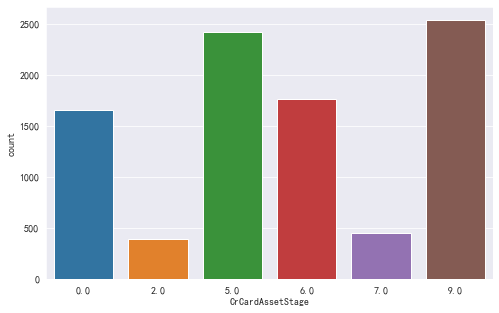

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(copy['CrCardAssetStage'])
savefig()

In [16]:
copy.to_excel(RESULT_PATH + '/result4.xlsx')